In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for plotting

In [2]:
# Function to fetch data about the cases and deaths of a country
def countryData(country):
    df = pd.read_csv('DataFolder/data.csv')
    df = df[df.iloc[:,0] == country]
    displayColumns = ['Entity', 'Date', 'Cases', 'Deaths']
    df = df[displayColumns]
    df['Daily Cases'] = abs(df['Cases'].diff()) # Daily cases are the difference between the cases of two consecutive days
    df['Daily Deaths'] = abs(df['Deaths'].diff()) # Daily deaths are the difference between the deaths of two consecutive days
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [3]:
# Function to plot the data of a country
def plotData(df):
    fig, ax1 = plt.subplots()
    
    ax1.plot(df['Date'], df['Daily Cases'], color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Cases', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax2 = ax1.twinx() # instantiate a second axis that shares the same x-axis
    ax2.plot(df['Date'], df['Daily Deaths'], color='red')
    ax2.set_ylabel('Daily Deaths', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    plt.title('Daily Cases and Deaths in ' + df['Entity'].iloc[0])
    plt.show()

In [4]:
# Function to get the cases and deaths of all countries per continent
def countriesPerContinentData():
    df = pd.read_csv('DataFolder/data.csv')
    deaths = df.groupby(['Entity', 'Continent'])['Deaths'].max()
    cases = df.groupby(['Entity', 'Continent'])['Cases'].max()
    data = np.empty((len(cases), 4), dtype=object) # 4 columns: country, continent, cases, deaths
    for i, ((country, continent), case) in enumerate(cases.iteritems()): # iterate over the cases
        data[i][0] = country
        data[i][1] = continent
        data[i][2] = case
    for i, ((country, continent), death) in enumerate(deaths.iteritems()): # iterate over the deaths
        data[i][3] = death
    
    data = data[np.argsort(data[:, 1])]
    return data

In [5]:
# Function to create a histogram of the cases and deaths of all countries per continent
def plotCountriesPerContinentData(data, continent):
    cont = data[data[:, 1] == continent] # Get the data of the continent
    
    # Create a histogram for each continent
    print('Histogram of cases per country in ' + continent)
    countries = cont[:, 0] # Get the countries of the continent
    cases = cont[:, 2].astype(int) # Get the cases of the continent
    plt.gca().set_xticklabels(countries, rotation=90)
    plt.bar(countries, cases) # Create the histogram
    plt.title('Cases per country in ' + cont[0][1])
    plt.xlabel('Country')
    plt.ylabel('Cases')
    plt.show()
        
    print('Histogram of deaths per country in ' + continent)
    countries = cont[:, 0]
    deaths = cont[:, 3].astype(int) # Get the deaths of the continent
    plt.gca().set_xticklabels(countries, rotation=90)
    plt.bar(countries, deaths)
    plt.title('Deaths per country in ' + cont[0][1])
    plt.xlabel('Country')
    plt.ylabel('Deaths')
    plt.show()

In [6]:
# Function to show the correlation between the columns of the dataset
def correlationData():
    df = pd.read_csv("DataFolder/data.csv")
    corr = df.corr() # Calculate the correlation between the columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap=plt.cm.Reds) # Create a heatmap
    plt.show()

In [7]:
def main():
    # Cases and deaths of Greece
    greece = countryData('Greece')
    plotData(greece)
    
    # Cases and deaths of Italy
    italy = countryData('Italy')
    plotData(italy)
    
    # Cases and deaths of Europe
    continentData = countriesPerContinentData()
    plotCountriesPerContinentData(continentData, 'Europe')
    
    # Cases and deaths of North America
    plotCountriesPerContinentData(continentData, 'North America')
    
    # Correlation between the columns
    correlationData()

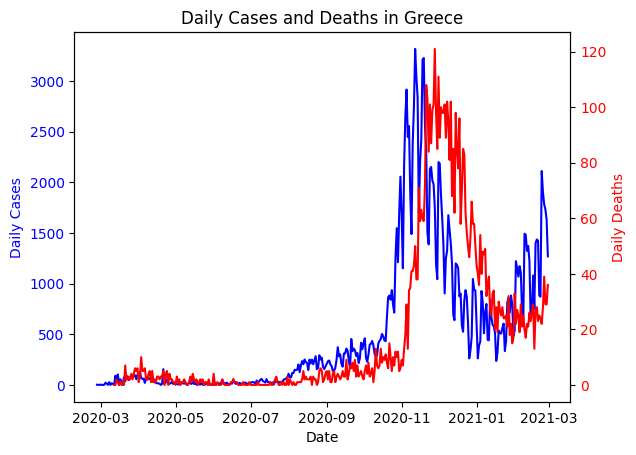

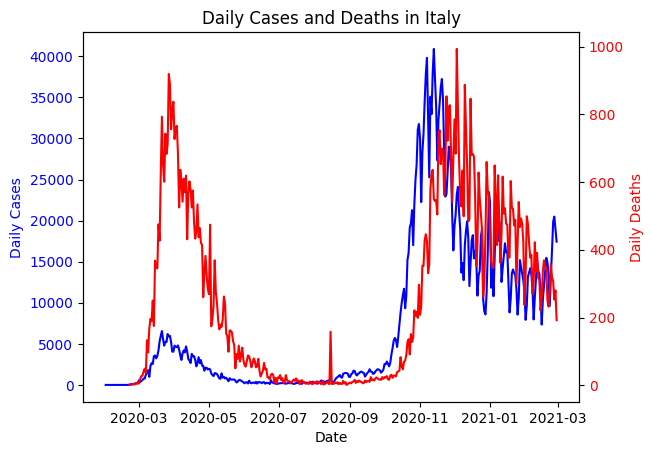

Histogram of cases per country in Europe


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


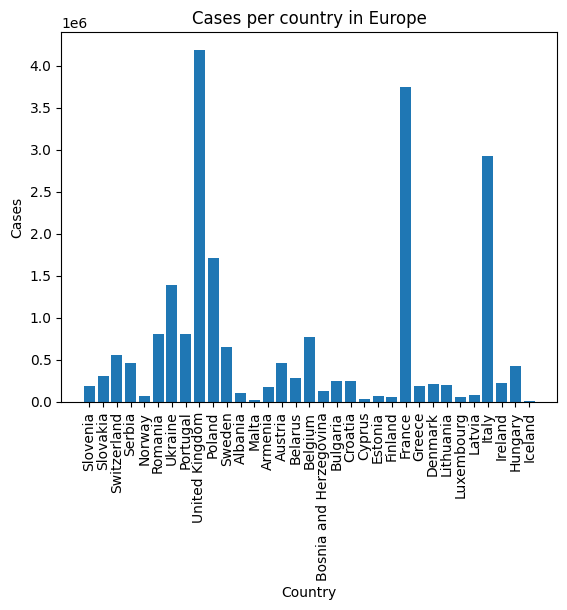

Histogram of deaths per country in Europe


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


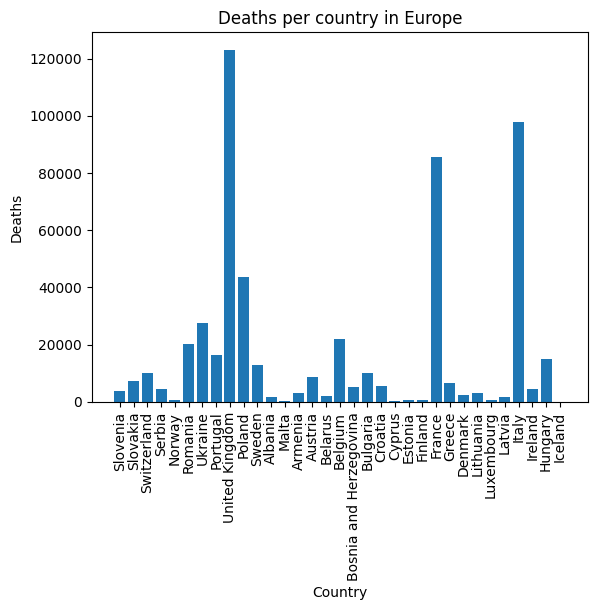

Histogram of cases per country in North America


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


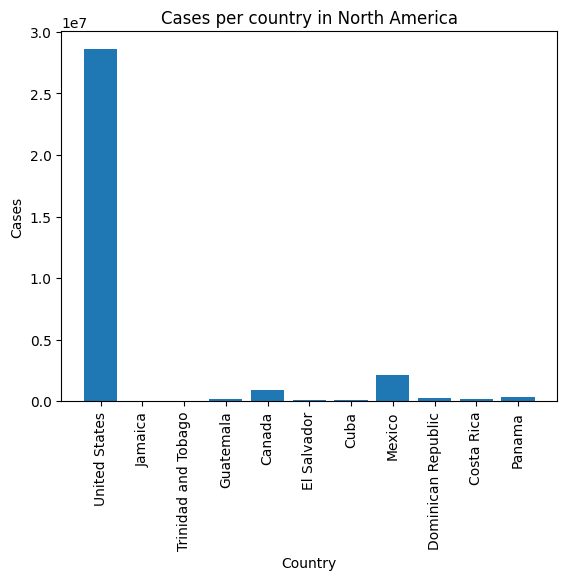

Histogram of deaths per country in North America


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


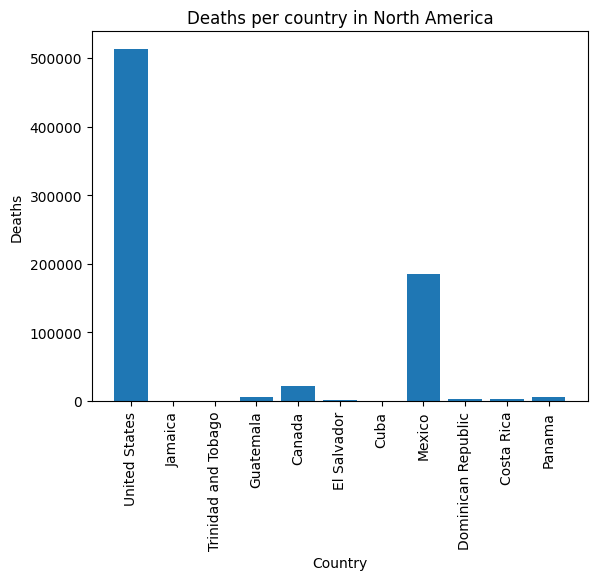

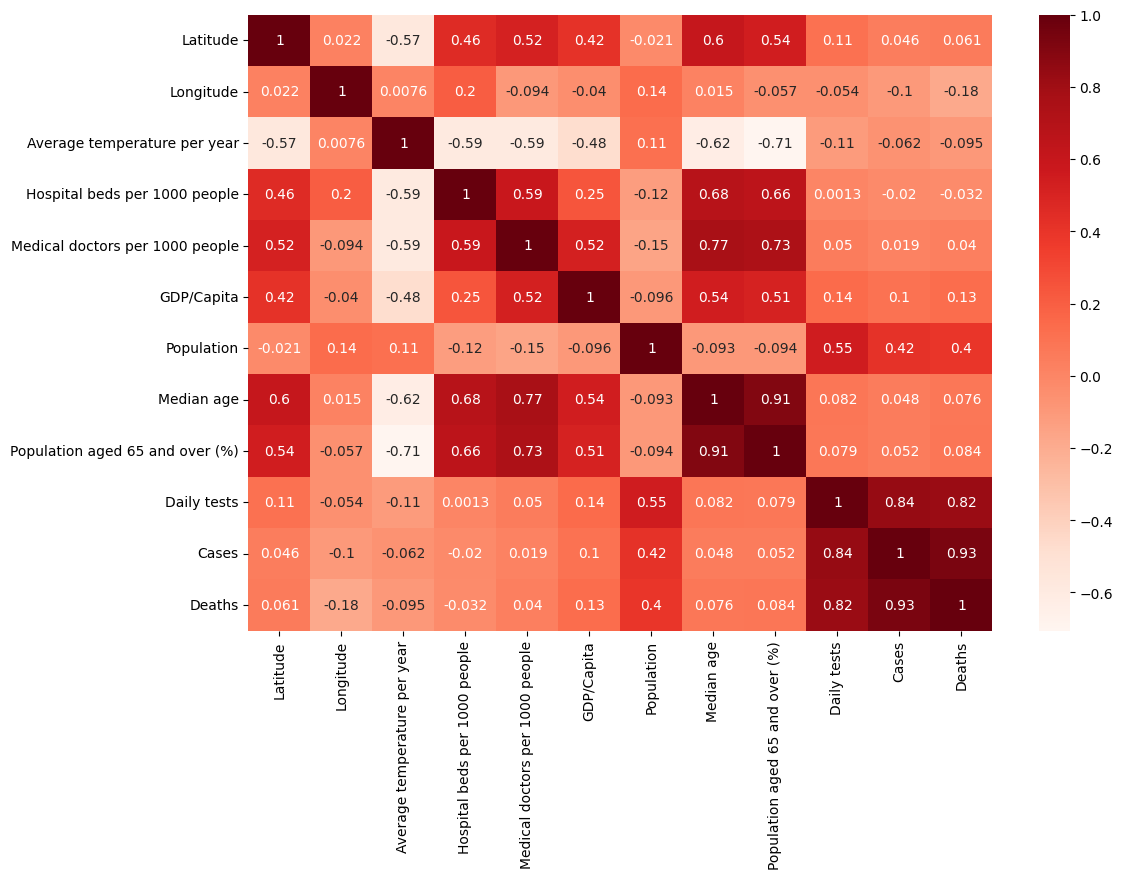

In [8]:
main()